<a href="https://colab.research.google.com/github/nagendra-98/Nagendra-gmail/blob/main/Student_scores_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dt = pd.read_csv('student_scores.csv')
#read the dataset

In [ ]:
print(dt.shape)
dt.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dt.Hours.quantile(0.75)

7.4

In [ ]:
dt.Hours.quantile(0.25)

2.7

In [ ]:
iqr = dt.Hours.quantile(0.75) - dt.Hours.quantile(0.25)
upper_threshold = dt.Hours.quantile(0.75)+(1.5*iqr)
lower_threshold = dt.Hours.quantile(0.25)-(1.5*iqr)
lower_threshold

-4.3500000000000005

In [ ]:
upper_threshold

14.450000000000001

In [ ]:
dt.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
dt = dt.drop_duplicates()
dt.shape

(25, 2)

In [ ]:
dt.dtypes

Hours     float64
Scores      int64
dtype: object

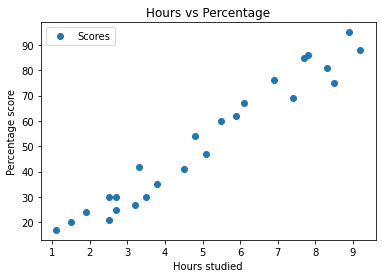

In [ ]:
dt.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [ ]:
dt.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
dt.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [242]:
a = [1, 2, 3, 4]
a[:-2]

[1, 2]

In [225]:
x = dt.loc[:, ['Hours']].values
y = dt.loc[:, ['Scores']].values

In [226]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.25, random_state = 870)

In [227]:
x_test

array([[4.5],
       [2.7],
       [1.9],
       [3.5],
       [1.5],
       [9.2],
       [7.8]])

In [228]:
y_test

array([[41],
       [30],
       [24],
       [30],
       [20],
       [88],
       [86]])

In [229]:
x_train.shape, x_test.shape

((18, 1), (7, 1))

In [231]:
x_test

array([[4.5],
       [2.7],
       [1.9],
       [3.5],
       [1.5],
       [9.2],
       [7.8]])

In [232]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [233]:
print(regressor.intercept_)

[2.2633902]


In [234]:
print(regressor.coef_)

[[9.84351355]]


In [235]:
regressor.predict([[7.5]])

array([[76.08974183]])

In [236]:
y_pred=regressor.predict(x_test)
y_pred

array([[46.55920117],
       [28.84087678],
       [20.96606594],
       [36.71568762],
       [17.02866052],
       [92.82371486],
       [79.04279589]])

In [245]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

ValueError: ignored

In [246]:
regressor.predict([[15]])

array([[149.91609346]])

In [254]:
from sklearn import metrics
print('R2_SCORE:, metrics.r2_score(y_test, y_pred')
regressor.score(x_test, y_test)

R2_SCORE:, metrics.r2_score(y_test, y_pred


0.966983654927976

In [255]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(x_train)
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)